In [50]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
data_path = "/home/maksim/datasets/Почищенный датасет с нормализованным эстимейтом - data_set_last7.csv"
data = pd.read_csv(data_path)

In [52]:
col_to_drop = ["sale_date", "Price","Owner","Size","EstimateFrom","EstimateTo","Time",
            "Description", "tried_url", "Image", "normalized_estimatefrom", 
            "normalized_estimateto"]

data.drop(columns=col_to_drop, inplace=True)

In [53]:
data.loc[data["normalized_price"] == 0, "normalized_price"] = 10**-10 #To take log
data["log10(normalized_price)"] = np.log10(data["normalized_price"]) 
data.drop(columns=["normalized_price"], inplace=True)

In [54]:
data.head()

,Author,Art,Sign,Technique,Material,Nazi,Framed,square_m,Currency,ExhibitedNum,...,number_of_day,day_of_week,month,year,deal_time_(utc),hasFollowers,hasAfter,isUntitled,isNumbered,log10(normalized_price)
0,willem de kooning,UNTITLED (WOMAN),1,oil,paper,0,0,0.0925,USD,5,...,344,Monday,12,2018,17:00,0,1,1.0,1.0,4.962042
1,willem de kooning,UNTITLED (STILL LIFE),1,oil,board,0,0,0.0601,USD,3,...,344,Monday,12,2018,17:00,0,1,1.0,0.0,4.962042
2,georgia o′keeffe,UNTITLED (ALLIGATOR PEAR IN RED DISH),0,oil,canvas,0,0,0.0516,USD,0,...,65,Thursday,3,2020,15:00,0,0,1.0,0.0,5.698970
3,franz kline,UNTITLED,1,oil,canvas,0,0,0.1144,USD,1,...,344,Monday,12,2018,17:00,0,0,1.0,0.0,3.910890
4,franz kline,UNTITLED,1,ink,paper,0,0,0.0590,USD,11,...,344,Monday,12,2018,17:00,0,0,1.0,0.0,4.551868


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14537 entries, 0 to 14536
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Author                   14537 non-null  object 
 1   Art                      14537 non-null  object 
 2   Sign                     14537 non-null  int64  
 3   Technique                14537 non-null  object 
 4   Material                 14537 non-null  object 
 5   Nazi                     14537 non-null  int64  
 6   Framed                   14537 non-null  int64  
 7   square_m                 14537 non-null  float64
 8   Currency                 14537 non-null  object 
 9   ExhibitedNum             14537 non-null  int64  
 10  ProvenanceNum            14537 non-null  int64  
 11  LiteratureNum            14537 non-null  int64  
 12  CataloguingLength        14537 non-null  int64  
 13  City                     14536 non-null  object 
 14  date_of_birth         

p-value is 0.06378152402572944


century,19,20
sex,,
F,30,139
M,1697,11698


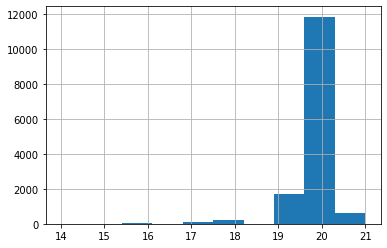

In [56]:
from scipy.stats import chi2_contingency 

data['century'].hist()
data_crosstab = pd.crosstab(data['sex'],  data["century"][ (data["century"]==19) | ( data["century"]==20)], margins = False) 

stat, p, dof, expected = chi2_contingency(data_crosstab) 
print("p-value is {}".format(p))
data_crosstab


In [57]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2)

train_label = train_set["log10(normalized_price)"]
test_label = test_set["log10(normalized_price)"]

train_index = train_set[["Author", "Art"]]
test_index = test_set[["Author", "Art"]]

train_set = train_set.drop(columns=["Author", "Art"]).copy()
test_set = test_set.drop(columns=["Author", "Art"]).copy()

In [58]:
train_set.describe()

,Sign,Nazi,Framed,square_m,ExhibitedNum,ProvenanceNum,LiteratureNum,CataloguingLength,date_of_birth,date_of_death,century,repeat_sale,number_of_day,month,year,hasFollowers,hasAfter,isUntitled,isNumbered,log10(normalized_price)
count,11629.000000,11629.000000,11629.000000,11629.000000,11629.000000,11629.000000,11629.000000,11629.000000,11629.000000,10723.000000,11629.000000,11629.000000,11629.000000,11629.000000,11629.000000,11629.000000,11629.000000,11620.000000,11623.000000,11629.000000
mean,0.876946,0.006105,0.228653,0.557047,1.064838,2.287901,0.971279,10.673575,1889.866885,1961.144829,19.854588,0.924327,187.568235,6.743572,2012.725600,0.014619,0.741938,0.088812,0.257421,5.061583
std,0.328514,0.077902,0.419983,1.005554,2.392388,2.616927,1.951696,243.974453,53.657791,53.397796,0.588497,0.264485,99.862427,3.276546,4.484612,0.120026,0.437587,0.284485,0.437232,1.299703
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1292.000000,1336.000000,14.000000,0.000000,18.000000,1.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,-10.000000
25%,1.000000,0.000000,0.000000,0.128400,0.000000,0.000000,0.000000,0.000000,1876.000000,1954.000000,20.000000,1.000000,97.000000,4.000000,2009.000000,0.000000,0.000000,0.000000,0.000000,4.406170
50%,1.000000,0.000000,0.000000,0.309900,0.000000,2.000000,0.000000,0.000000,1894.000000,1973.000000,20.000000,1.000000,171.000000,6.000000,2013.000000,0.000000,1.000000,0.000000,0.000000,4.993414
75%,1.000000,0.000000,0.000000,0.616500,1.000000,4.000000,1.000000,0.000000,1923.000000,1987.000000,20.000000,1.000000,291.000000,10.000000,2017.000000,0.000000,1.000000,0.000000,1.000000,5.778151
max,1.000000,1.000000,1.000000,28.000000,39.000000,24.000000,44.000000,17296.000000,1965.000000,2019.000000,21.000000,1.000000,354.000000,12.000000,2020.000000,1.000000,1.000000,1.000000,1.000000,7.976563


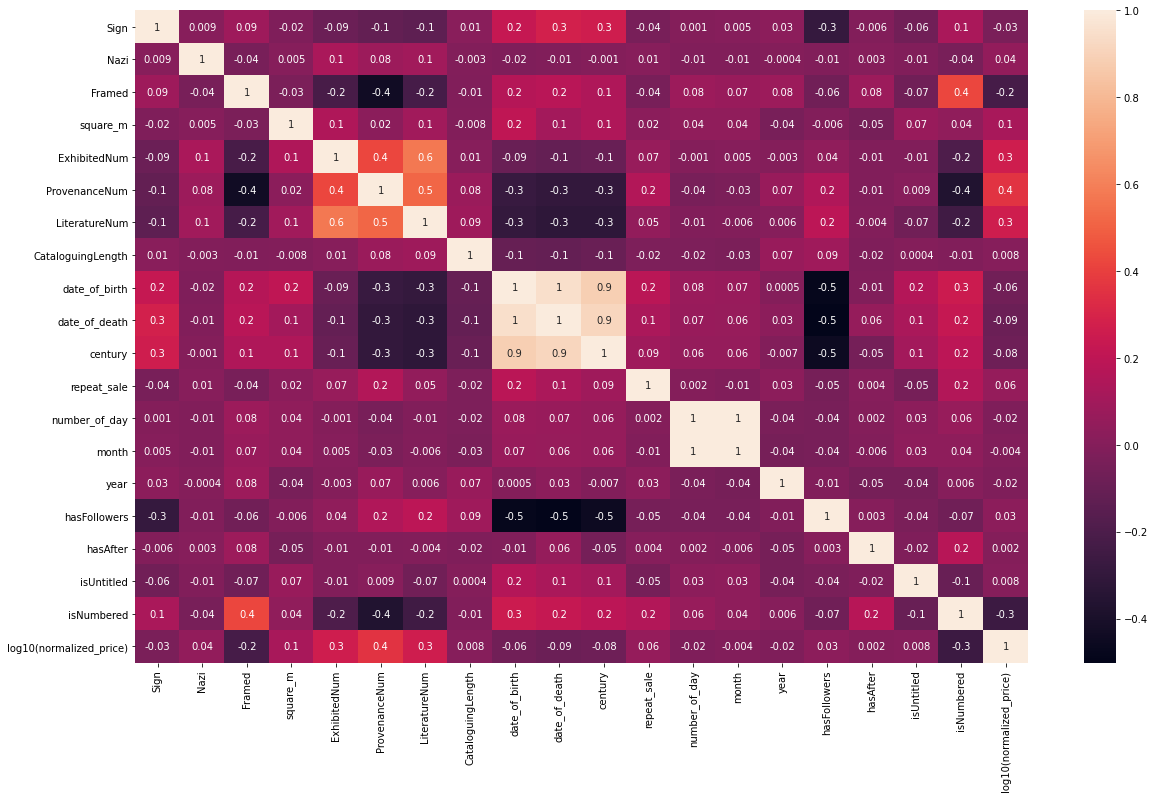

In [59]:
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(train_set.corr(), annot = True, fmt='.1g')
plt.show()

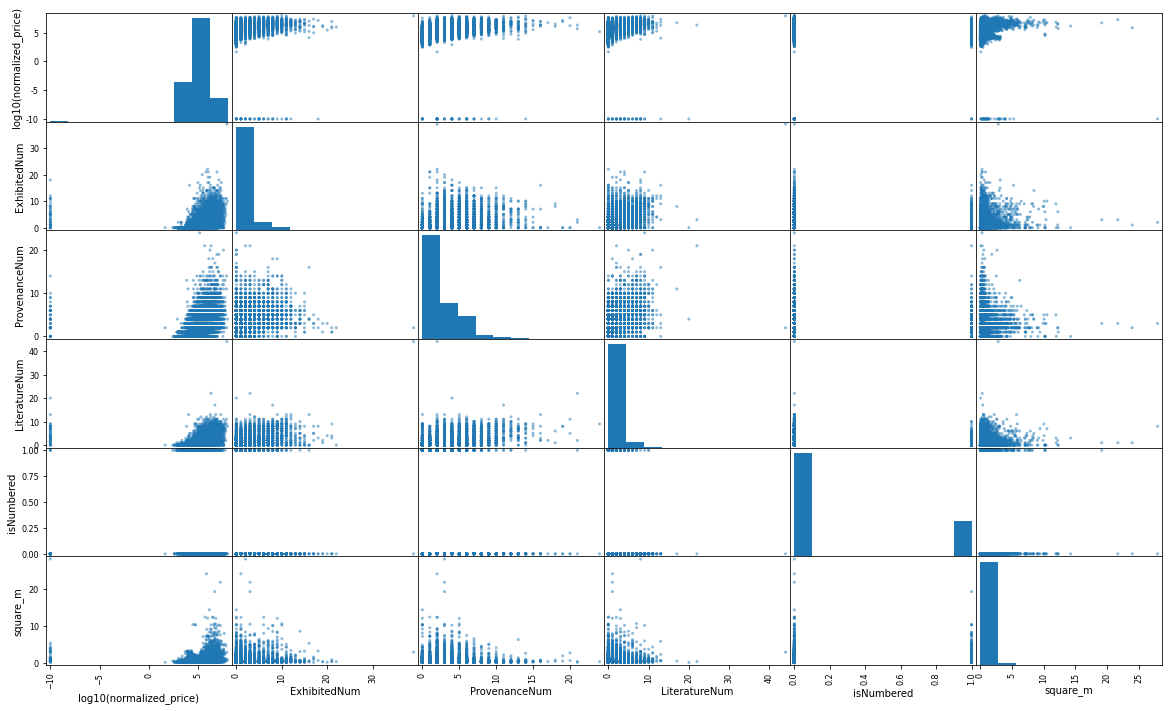

In [60]:
from pandas.plotting import scatter_matrix
attributes = ["log10(normalized_price)", "ExhibitedNum","ProvenanceNum","LiteratureNum","isNumbered","square_m"]
scatter_matrix(train_set[attributes], figsize=(20, 12))
plt.show()

In [61]:
train_set = train_set.drop(columns=["log10(normalized_price)"]).copy()
test_set = test_set.drop(columns=["log10(normalized_price)"]).copy()

data_num = train_set.select_dtypes(include=['int64', 'float64'])
data_cat = train_set.select_dtypes(include='object')

In [79]:
from sklearn.base import BaseEstimator, TransformerMixin


class CreateDummies(BaseEstimator, TransformerMixin):
    def __init__(self,attrib = None):
        pass
    def fit(self, X):
        return self
    def transform(self, X):
        self.attrib =  pd.get_dummies(pd.DataFrame(X)).columns
        return pd.get_dummies(pd.DataFrame(X)).values

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values


In [80]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

    
num_pipeline = Pipeline([
('selector', DataFrameSelector(data_num.columns)),
('imputer', SimpleImputer(strategy="median")),
('std_scaler', StandardScaler()),
])

In [81]:
cat_pipeline = Pipeline([
('selector', DataFrameSelector(data_cat.columns)),
('create_dummies', CreateDummies()),
])

In [82]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
("num_pipeline", num_pipeline),
("cat_pipeline", cat_pipeline),
])

In [83]:
train_prepared = full_pipeline.fit_transform(train_set)
np.shape(train_prepared)

(11629, 224)

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_prepared, train_label)

scores = cross_val_score(lin_reg, train_prepared, train_label,
scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [69]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(lin_rmse_scores)

Scores: [3.03827115e+08 2.88437298e+08 1.04768819e+00 1.19748012e+09
 2.30650931e+09 3.05249468e+08 7.99090816e+08 6.27506364e+08
 4.14891565e+09 7.91230648e+08]
Mean: 1076824679.4293542
Standard deviation: 1195783071.8074427


In [70]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_prepared, train_label)

scores = cross_val_score(tree_reg, train_prepared, train_label,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [71]:
display_scores(tree_rmse_scores)

Scores: [1.66790197 1.7903249  1.29508228 1.62071311 1.81366505 1.38624374
 1.4521649  1.57449542 1.40707225 1.82965529]
Mean: 1.583731891611659
Standard deviation: 0.1831405031430479


In [72]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(train_prepared, train_label)

scores = cross_val_score(forest_reg, train_prepared, train_label,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [73]:
display_scores(tree_rmse_scores)

Scores: [0.93029421 1.29886966 1.02733422 1.1462043  1.38112283 1.19991226
 1.09740866 1.01549014 1.16870926 0.76292206]
Mean: 1.1028267597013595
Standard deviation: 0.1703490783006004


In [87]:
feature_importances = forest_reg.feature_importances_

num_attribs = list(data_num)

cat_attribs = list(cat_pipeline.named_steps["create_dummies"].attrib)
attributes = num_attribs + cat_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.1703774452520988, 'square_m'),
 (0.14505197406395345, 'ProvenanceNum'),
 (0.06700754274816381, 'LiteratureNum'),
 (0.06011562677853687, 'ExhibitedNum'),
 (0.05516596566382914, 'year'),
 (0.036970782393933636, 'number_of_day'),
 (0.03329274331520282, '1_paper'),
 (0.02223481478586128, 'date_of_death'),
 (0.019406956080359097, '0_oil'),
 (0.019347269477947848, 'date_of_birth'),
 (0.018667634478798344, '1_canvas'),
 (0.016397582729775494, '0_lithograph'),
 (0.0158472700721864, '9_Monday'),
 (0.015493397055068131, '10_24:00:00'),
 (0.01535179838273975, '10_23:00'),
 (0.012284645078832956, '4_Spaniard'),
 (0.012108407021708205, '6_modern'),
 (0.01049914933113493, '6_expressionism'),
 (0.009543477960394278, 'hasAfter'),
 (0.009036375256815887, '9_Wednesday'),
 (0.008674722711834485, 'month'),
 (0.008491096367947643, 'Sign'),
 (0.008313980229089022, '9_Tuesday'),
 (0.007154804795320679, '4_Jew'),
 (0.0070495071312790605, '3_hong kong'),
 (0.006831010148416183, '1_tin'),
 (0.00669346449489

In [91]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(train_prepared, train_label)

scores = cross_val_score(ridge_reg, train_prepared, train_label,
scoring="neg_mean_squared_error", cv=10)
ridge_rmse_scores = np.sqrt(-scores)

In [93]:
display_scores(ridge_rmse_scores)

Scores: [0.9661513  1.31952034 1.04681283 1.18849603 1.34522434 1.18059863
 0.97093951 1.0479832  1.20263897 0.68885315]
Mean: 1.0957218295629478
Standard deviation: 0.18497351482946167


In [96]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(train_prepared, train_label)

scores = cross_val_score(lasso_reg, train_prepared, train_label,
scoring="neg_mean_squared_error", cv=10)
lasso_rmse_scores = np.sqrt(-scores)

In [97]:
display_scores(lasso_rmse_scores)

Scores: [1.04560966 1.37637729 1.13731045 1.2464576  1.40658612 1.24916961
 1.04567986 1.14231272 1.2577154  0.83020699]
Mean: 1.1737425693705767
Standard deviation: 0.16323450340699028


In [98]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(train_prepared, train_label)

scores = cross_val_score(elastic_net, train_prepared, train_label,
scoring="neg_mean_squared_error", cv=10)
elastic_rmse_scores = np.sqrt(-scores)

In [99]:
display_scores(elastic_rmse_scores)

Scores: [1.02387246 1.36656849 1.11221621 1.23004702 1.39987362 1.23051661
 1.01464749 1.12311224 1.23667945 0.78975285]
Mean: 1.1527286441942874
Standard deviation: 0.17199566696221447
